# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 17 de abril de 2022__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
RANDOM_STATE = 22

# Apartado 2: Recuperación de información

__Número de grupo: 15__

__Nombres de los estudiantes: Javier Sande Ríos y Mario Sanz Guerrero__

## 1) Carga del conjunto de datos

El fichero `BBC News.csv` contiene noticias clasificadas en 5 categorías diferentes. 

Carga los datos en un dataframe teniendo en cuenta que la columna `ArticleId` es un identificador de la noticia y por lo tanto no lo vamos a usar. 

Estudia el tamaño del conjunto de datos y la proporción de noticias que pertenecen a cada una de las categorías.

Crea una partición estratificada de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. 

#### Solución:

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv('BBC News.csv')
df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [4]:
df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

<AxesSubplot:>

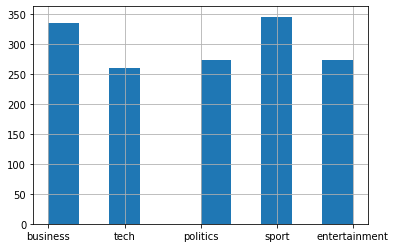

In [5]:
df['Category'].hist()

Como podemos ver al hacer la funcion value_counts() y al ver el histograma, la cantidad de noticias pertenecientes a cada categoría varía bastante, pero no lo suficiente como para suponer un problema a la hora de clasificar las noticias según su categoría porque tenemos una cantidad suficiente de cada una.

A continuación vamos a crear las particiones de los datos, a las que le daremos un 80% de los datos para entrenamiento y el 20% restante para test.

In [6]:
from sklearn.model_selection import train_test_split

news = df['Text'].to_numpy()
categories = df['Category'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(news,
                                                    categories,
                                                    test_size = 0.2,
                                                    random_state = RANDOM_STATE,
                                                    shuffle = True,
                                                    stratify = categories)

## 2) Representación basada en bolsa de palabras y tf-idf

La primera vectorización que vamos a usar representará los mensajes usando el modelo de bolsa de palabras, monogramas y el valor tf-idf de cada palabra. Usa como _stop words_ las que vienen configuradas por defecto para el inglés.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test. Muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?

Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y comenta las clases en las que se comporta mejor y peor. ¿Crees que los resultados son buenos?

#### Solución:

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words = 'english',
                             binary = False, # frecuencia de aparición (NO simplemente si aparece o no)
                             ngram_range=(1,1), # solo monogramas
                             token_pattern=r'(?u)\b[A-Za-z]+\b') # solo palabras que tengan letras

train_vector_data = vectorizer.fit_transform(X_train)

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer 

tfidftrans = TfidfTransformer()
train_preprocessed = tfidftrans.fit_transform(train_vector_data)

In [21]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, 'SIN vectorizar:', data[index], '\n')
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [22]:
feature_names = vectorizer.get_feature_names()
write_terms(feature_names, X_train, train_preprocessed, 10)

Mensaje 10 SIN vectorizar: blair ready to call election tony blair seems certain to end weeks of phoney war on monday and announce there will be a general election on 5 may.  the date has been pencilled into the diaries of politicians and political journalists for many months and  despite occasional panics that the prime minister was on the verge of calling a snap poll  it has not shifted. over the weeks  there have been any number of signs that 050505 was going to be the day mr blair would go for an historic third term. and the calling of a special political cabinet meeting has only added to the belief that the announcement is imminent. the prime minister and his campaign boss alan milburn have already insisted the election will be fought on the economy and what they claim is a stark choice between labour s stability and investment against tory cuts and boom and bust.  and chancellor gordon brown has stepped into the front line of the campaign - to the relief of many of his supporters

Como vemos, el mensaje vectorizado es un conjunto de todas las palabras que contiene el mensaje. Al ser un conjunto, cada palabra aparece una sola vez, pero internamente tiene almacenada la frecuencia de aparición de cada palabra, ya que así se lo hemos pedido al poner la variable `binary = False` en la inicialización de `vectorizer`.

Para estudiar las palabras eliminadas al aplicar la vectorización vamos a hacer una función similar a la anterior. Esta función (`palabras_eliminadas`) va a iterar por cada palabra del texto original y la buscará en el conjunto del mensaje vectorizado. En caso de que el conjunto no incluya esta palabra, será porque se ha eliminado. Estas palabras serán impresas por la función.

In [17]:
def palabras_eliminadas (feature_names, data, vector_data, index):
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    conjunto = terminos.compressed()
    
    # mensaje original
    for palabra in data[index].split():
        if palabra not in conjunto:
            print(palabra)

In [18]:
palabras_eliminadas(feature_names, X_train, train_vector_data, 10)

to
call
seems
to
of
on
and
there
will
be
a
on
5
may.
the
has
been
into
the
of
and
for
many
and
that
the
was
on
the
of
a
it
has
not
shifted.
over
the
there
have
been
any
of
that
050505
was
to
be
the
would
go
for
an
third
term.
and
the
of
a
has
only
to
the
that
the
is
imminent.
the
and
his
have
already
the
will
be
on
the
and
what
they
is
a
between
and
against
and
and
bust.
and
has
into
the
front
of
the
-
to
the
of
many
of
his
in
-
to
that
message.
and
it
is
one
of
the
at
the
of
the
will
be
around
the
and
policies.
during
the
into
over
its
that
was
£35
in
services.
the
found
himself
to
how
a
in
by
the
to
was
a
cut.
and
it
the
-
which
was
already
being
for
being
into
by
on
such
as
and
-
was
on
the
rocks.
then
was
to
have
was
even
.
he
was
for
his
but
the
had
been
done
and
the
was
back
on
track.
a
will
be
over
with
the
the
has
to
fill
a
at
the
of
his
and
will
be
to
if
again.
that
his
are
and
that
of
have
inaccurate.
as
the
will
have
to
to
get
their
over
the
of
between
the
two
parties.
but
h

Si analizamos las palabras que han sido eliminadas, todas ellas son palabras en inglés que se repiten mucho y que no aportan conocimiento al mensaje. Simplemente aportan corrección sintáctica, pero son palabras vacías, lo que conocemos como **stop words**. Si revisamos la inicialización de `vectorizer`, vemos que le habíamos pedido que quitara las stop words del inglés, así que es correcto que estas palabras no hayan sido incluidas en la vectorización.

Vamos a hacer lo mismo pero para el conjunto de test:

In [23]:
# IMPORTANTE: Para el conjunto de test no hace falta el "fit", ya que vamos a usar solo las palabras
# encontradas en el conjunto de entrenamiento, por lo que haremos solo "transform"
test_vector_data = vectorizer.transform(X_test)
# Calculamos también su valor TF-IDF (el IDF es el del conjunto de entrenamiento)
test_preprocessed = tfidftrans.transform(test_vector_data)

Definimos una serie de funciones para calcular la precisión@5 de cada una de las clases.

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

def knn(query, X_train, k):
    '''Devuelve los índices de los k documentos de entrenamiento más similares a la consulta usando 
    la similitud del coseno.
    
    Parámetros:
    - query: documento consulta vectorizado
    - X_train: documentos de entrenamiento vectorizados
    - k: número de documentos a recuperar
    
    Devuelve:
    - índices de los k documentos más similares a la consulta.
    '''
    
    # Necesitamos un vector de dimensión (1, X). Si se pasa un vector de dimensión X, transformarlo
    if len(query.shape) == 1:
        query = query.reshape(1, -1)

    simil = cosine_similarity(query, X_train)
    simil_idx = np.argsort(simil.flatten())
    simil_idx = simil_idx[::-1]
    return simil_idx[:k]

In [25]:
def precision_at_k(y_selected, y_real, k):
    '''Devuelve la precisión @k de los documentos seleccionados.
    
    Parametros:
    - y_selected: etiquetas de los documentos seleccionados (se usan los k primeros)
    - y_real: etiqueta de la categoría correcta
    - k: número de documentos que se tienen en cuenta
    
    Devuelve:
    - Precisión@k
    '''
    
    return np.sum(y_selected[:k] == y_real) / k * 100

In [26]:
def mean_precisions_per_class(X_train, y_train, X_test, y_test, k):
    '''Devuelve las precision@k media para cada una de las classes.
    
    Parámetros:
    - X_train: documentos de entrenamiento vectorizados.
    - y_train: etiquetas de los documentos de entrenamiento.
    - X_test: documentos vectorizados que se usan como consultas
    - y_test: etiquetas de los documentos que se usan como consultas
    - k: número de documentos considerados a recuperar por la consulta
    
    Devuelve:
    - Diccionario clase -> precisión en tanto por ciento.
    '''
    
    # diccionario categoría -> lista de precisiones
    y_precisions = {y: [] for y in np.unique(y_test)}
    
    # Calcular precision@k para cada consulta
    for x_query, y_query in zip(X_test, y_test):
        idx = knn(x_query, X_train, k)
        y_selected = np.take(y_train, idx)
        precision = precision_at_k(y_selected, y_query, k)
        y_precisions[y_query].append(precision)
        
    # Calcular medias
    for y in y_precisions:
        y_precisions[y] = np.mean(y_precisions[y])
    
    return y_precisions

Vamos a realizar el cálculo y análisis de la precisión@5.

In [27]:
p5 = mean_precisions_per_class(train_preprocessed, y_train, test_preprocessed, y_test, 5)
p5

{'business': 84.77611940298507,
 'entertainment': 87.27272727272727,
 'politics': 90.9090909090909,
 'sport': 95.94202898550725,
 'tech': 86.92307692307692}

Para facilitar el análisis y lectura de estos resultados, vamos a dibujarlos en un diagrama de barras.

<AxesSubplot:>

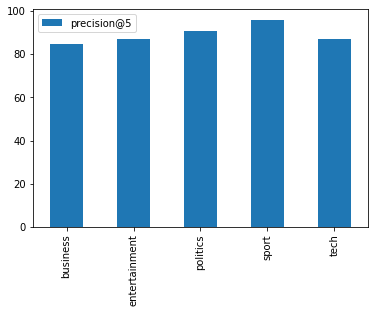

In [32]:
import pandas as pd

df_p5 = pd.DataFrame.from_dict(p5, orient='index', columns=['precision@5'])

df_p5["target"] = list(set(y_test))

d = df_p5.set_index("target")

df_p5.plot.bar()

Vemos unos resultados muy buenos con una precisión muy alta. Los porcentajes de precisión varían entre el 85% y el 95%, aproximadamente. Estos son valores muy buenos.

La categoría de deportes es la que mejor precisión tiene con bastante diferencia. Esto se debe a que seguramente se use vocabulario muy específico, ya que será complicado por ejemplo encontrar la palabra _gol_ en el resto de categorías.

Las categorías con peor precisión son las de tecnología y negocios, seguramente por lo contrario al caso anterior. Usarán vocabulario más genérico o más compartido entre ellas. Por ejemplo, la palabra _Excel_ podría estar perfectamente en cualquiera de las dos categorías, refiriendose a una fuente de información económica (negocios) o a una actualización del software (tecnología).

A pesar de estas pequeños fallos en la precisión, los resultados obtenidos son muy buenos.

## 3) Representación basada en word-embeddings y tf-idf

La segunda vectorización que vamos a usar representará los mensajes usando usando word-embeddings usando como pesos la frecuencia de aparición de cada palabra. Al igual que en el apartado anterior, usaremos monogramas y las _stop words_ que vienen configuradas por defecto para el inglés. Recuerda usar como vocabulario para vectorizar el vocabulario del fichero con las word-embeddings.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test.

Calcula la precisión@5 de cada una de las clases usando como consultas los documentos de la partición de test y la similitud del coseno. Vamos a considerar que un documento recuperado es relevante cuando pertenezca a la misma clase que la consulta.

Dibuja los resultados en un diagrama de barras y compara los resultados con los del apartado anterior.

#### Solución:

## 4) Análisis de errores

Vamos a investigar los resultados para entender mejor dónde están fallando los procesos de recuperación. Sigue los siguientes pasos.


1. Identifica la categoría de noticias donde la precisión media haya mejorado más al incorporar word-embeddings
2. Para dicha categoría, identifica la consulta donde la precisión haya mejorado más al usar word-embeddings
3. Muestra el texto original de la consulta y los términos que aparecen en las dos vectorizaciones tf-idf que usamos (recuerda que usamos diccionarios distintos para las vectorizaciones bolsa de palabras y word-embeddings).
4. Identifica las noticias recuperadas para dicha consulta para las dos aproximaciones y sus categorías (TF-IDF puro y con word-embeddings)
5. Muestra la intersección de términos entre la consulta y la primera noticia mal recuperada usando TF-IDF puro.
6. Muestra la intersección de términos entre la consulta y la última noticia bien recuperada usando word-embeddings.
7. A la luz de todo lo anterior, razona sobre por qué crees que el TF-IDF no fue capaz de clasificar bien la noticia y el word-embedding sí.


Puedes usar el código que calcula la intersección de términos que ponemos a continuación

In [ ]:
def terms_in_message(feature_names,vector_data,index):
    '''
    Devuelve un conjunto los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    mensaje=vector_data[index,:]>0
    terminos_presentes = ma.array(feature_names, mask = ~(mensaje[0].toarray()))

    return set(terminos_presentes.compressed())

#### Solución: